# Movie Rating Prediction Using Python


## Task 1
## Muhammad Areeb Alam @ Codsoft

### Importing The Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Importing The Dataset

In [3]:
movie = pd.read_csv('IMDb Movies India.csv', encoding = 'Latin-1')

In [4]:
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


### Facts About the Dataset

In [5]:
# rows and columns in the dataset (row,col)
movie.shape

(15509, 10)

In [6]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


### Null Values In The Dataset

In [7]:
movie.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

### Dropping The Null Values From The Dataset

##### Since we are building a model that predicts the rating of a movie based on features like genre, director, and actors, we would remove the null values from the following columns: Name, Year, Duration, Votes, Rating

In [8]:
movie.dropna(subset=['Name','Year','Duration','Votes','Rating'], inplace = True)

In [9]:
#rechecking the null values
movie.isnull().sum()

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64

### Checking For Duplicates And Remove If Any

In [10]:
movie[movie.duplicated(subset=['Name','Year','Director'])]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
12421,Sant Dnyaneshwar,(1940),137 min,Biography,8.1,9,Vishnupant Govind Damle,Sheikh Fattelal,Shahu Modak,Datta Dharmadhikari


In [11]:
movie[movie.Name == 'Sant Dnyaneshwar']

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
12420,Sant Dnyaneshwar,(1940),139 min,Fantasy,7.9,45,Vishnupant Govind Damle,Sheikh Fattelal,Shahu Modak,Datta Dharmadhikari
12421,Sant Dnyaneshwar,(1940),137 min,Biography,8.1,9,Vishnupant Govind Damle,Sheikh Fattelal,Shahu Modak,Datta Dharmadhikari


In [12]:
movie.drop_duplicates(subset=['Name','Year','Director'], keep='first', inplace= True)

### Cleansing Year, Duration and Votes Columns

##### A series of code is written to remove '()' from 'Year' Column, remove 'min' from Duration Column and remove ',' from Votes Column and Convert all three of them to Integer Data Type

In [13]:
movie['Year'] = movie['Year'].str.replace('(','').str.replace(')','').astype(int)
movie['Duration'] = movie['Duration'].str.replace('min','').str.strip().astype(int)
movie['Votes'] = movie['Votes'].str.replace(',','').astype(int)

### Updated Facts after Pre-Processing

In [14]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5850 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5850 non-null   object 
 1   Year      5850 non-null   int32  
 2   Duration  5850 non-null   int32  
 3   Genre     5819 non-null   object 
 4   Rating    5850 non-null   float64
 5   Votes     5850 non-null   int32  
 6   Director  5849 non-null   object 
 7   Actor 1   5775 non-null   object 
 8   Actor 2   5733 non-null   object 
 9   Actor 3   5687 non-null   object 
dtypes: float64(1), int32(3), object(6)
memory usage: 434.2+ KB


In [15]:
movie.describe()

,Year,Duration,Rating,Votes
count,5850.000000,5850.000000,5850.000000,5850.000000
mean,1996.426496,132.293675,5.931504,2611.717949
std,19.902673,26.558025,1.389772,13434.933770
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,117.000000,5.000000,28.000000
50%,2002.000000,134.000000,6.100000,119.000000
75%,2013.000000,150.000000,7.000000,862.750000
max,2021.000000,321.000000,10.000000,591417.000000


In [16]:
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


### Exploratory Data Analysis

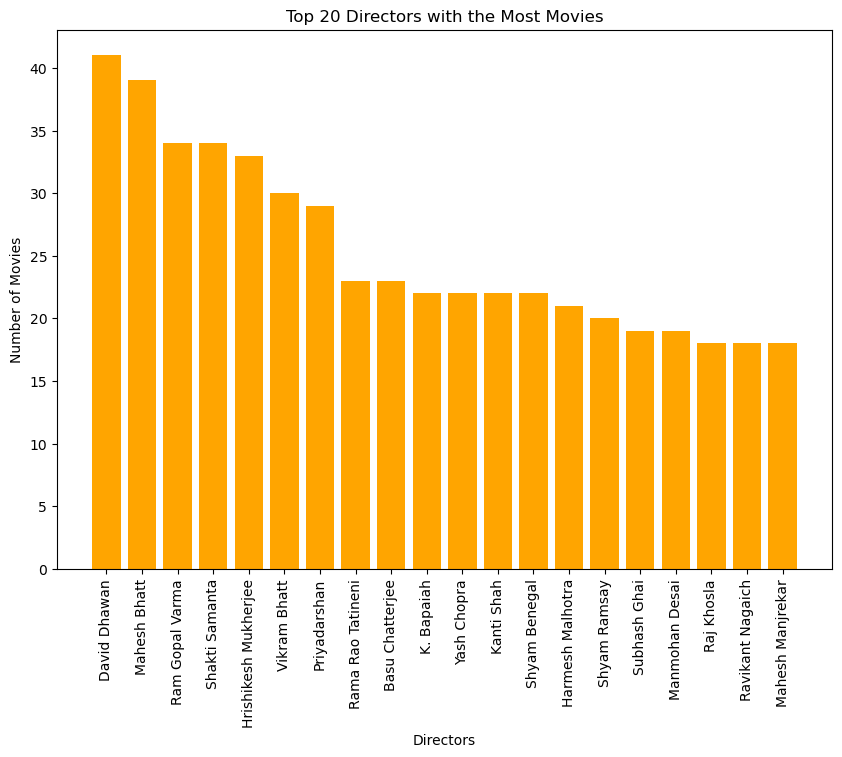

In [17]:
plt.figure(figsize = (10,7))
plt.bar(movie.Director.value_counts().index[:20], movie.Director.value_counts().values[:20], color='Orange')
plt.xticks(rotation=90)
plt.xlabel('Directors')
plt.ylabel('Number of Movies')
plt.title('Top 20 Directors with the Most Movies')
plt.show()

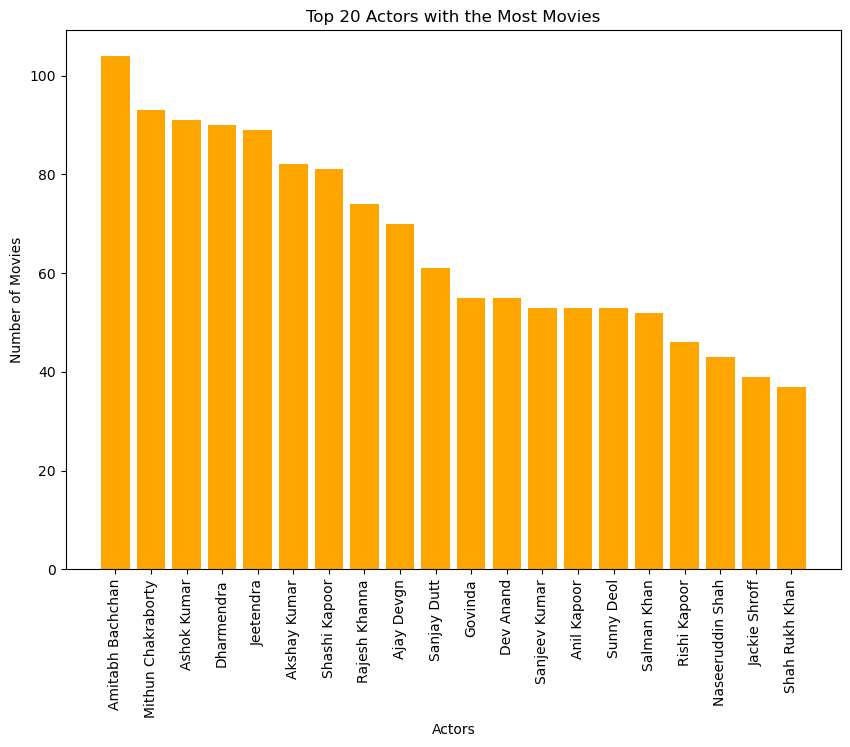

In [18]:
plt.figure(figsize = (10,7))
plt.bar(movie['Actor 1'].value_counts().index[:20], movie['Actor 1'].value_counts().values[:20], color='Orange')
plt.xticks(rotation=90)
plt.xlabel('Actors')
plt.ylabel('Number of Movies')
plt.title('Top 20 Actors with the Most Movies')
plt.show()

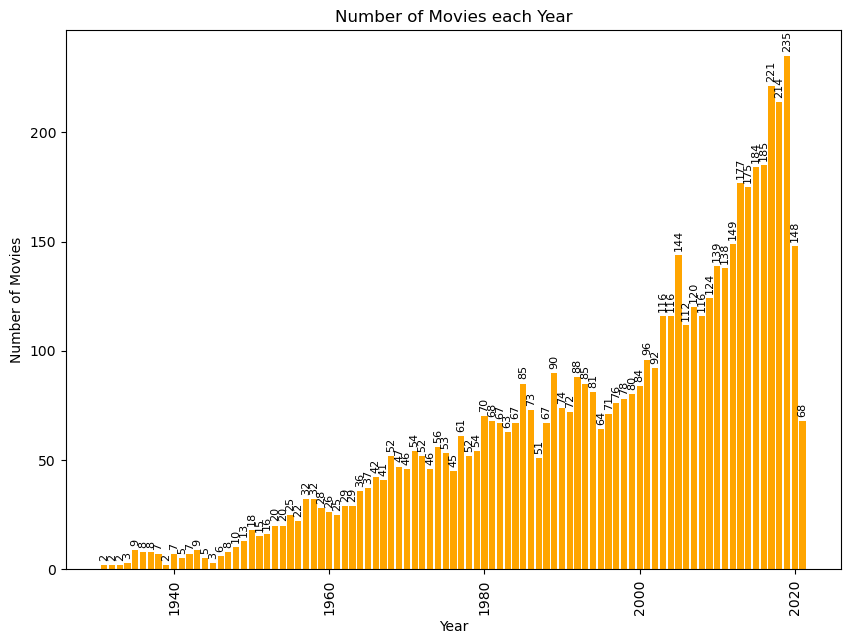

In [19]:
plt.figure(figsize = (10,7))
x = plt.bar(movie['Year'].value_counts().index, movie['Year'].value_counts().values, color='Orange')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies each Year')
for bar in x:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom', rotation=90, fontsize=8)
plt.show()

### Feature Engineering

In [20]:
movie.corr()['Rating']

Year       -0.183657
Duration   -0.031147
Rating      1.000000
Votes       0.134800
Name: Rating, dtype: float64

##### We will drop the columns not mentioned above as they are not dependable observation for our target variable rating

In [21]:
movie.drop(['Name','Director','Actor 1','Actor 2','Actor 3'], axis=1,inplace=True)
movie.head()

,Year,Duration,Genre,Rating,Votes
1,2019,109,Drama,7.0,8
3,2019,110,"Comedy, Romance",4.4,35
5,1997,147,"Comedy, Drama, Musical",4.7,827
6,2005,142,"Drama, Romance, War",7.4,1086
8,2012,82,"Horror, Mystery, Thriller",5.6,326


### Train Test Split

In [22]:
X = movie[['Year','Duration','Votes']]
y = movie['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

### Model Building

### Using SGD Regression

In [23]:
# Initialize and fit the scaler on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize and train the SGDRegressor model
sgd_regressor = SGDRegressor(max_iter=10000, random_state=1000)
sgd_regressor.fit(X_train_scaled, y_train)

# Preprocess the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Make predictions
y_pred = sgd_regressor.predict(X_test_scaled)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 1.0219083210736135
Mean Squared Error: 1.7172911931462846
R-squared: 0.040890777701032555


### Model Prediction

In [24]:
new_input = pd.DataFrame({
    'Year': [2013],          # Replace with the desired year
    'Duration': [100],       # Replace with the desired duration in minutes
    'Votes': [10000],        # Replace with the desired number of votes
})

# Scale the input data using the same scaler as during training
X_new_scaled = scaler.transform(new_input)


# Make predictions on the scaled input data
predictions = sgd_regressor.predict(X_new_scaled)

# Print the predicted rating
print("Predicted Movie Rating:", predictions[0])

Predicted Movie Rating: 6.067963530208668
